In [25]:
import gym
import gym_env
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

env = gym.make('foraging-replenishing-patches-v0')

env.reset()
for i in range(300):
    action = np.random.randint(9)
    state, reward, done, _ = env.step(action)
    #print(action, state, reward, done)
    if done:
        break


In [26]:
def exploit_or_explore(r,T,c=0.5, beta=0.5):

    return 1 / (1 + np.exp(-(c + beta*(r - T)))) #probability of staying

In [27]:
def sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.7, alpha = 0.2):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
    
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.argmax(Q)
      target = r - reward
      if not terminal : target = target + gamma*(Q[ns])
      error = target - Q[s]
      alpha = 1 + min(decayTill/1.6 -1,i)*(0.2-1)/(decayTill/1.6-1)
      Q[s] += error/N[s]
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
      
    rewards.append(reward)
    Q_est[i] = Q
    
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  
  for i in range(10):
    Q_test = np.array(Q)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q_test[s] += (r-reward-Q_test[s])/5
      reward = r
      a = np.argmax(Q_test)
      if a!=s : leave_count[s]+=1
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards

In [28]:
def q_learning(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.7, alpha = 0.2):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
    
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.argmax(Q)
      target = r - reward
      if not terminal : target = target + gamma*np.max(Q)
      error = target - Q[s]
      alpha = 1 + min(decayTill/1.6 -1,i)*(0.2-1)/(decayTill/1.6 -1)
      Q[s] += error/N[s]
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
      
    rewards.append(reward)
    Q_est[i] = Q
    
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  patch_staying_time=[[0],[0],[0],[0],[0],[0],[0],[0]]
  for i in range(10):
    Q_test = np.array(Q)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q_test[s] += (r-reward-Q_test[s])/5
      reward = r
      a = np.argmax(Q_test)
      if a!=s : leave_count[s]+=1; patch_staying_time[s].append(staying_time[s]-patch_staying_time[s][-1])
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards,patch_staying_time

In [43]:
def q1_learning(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.7, alpha = 0.2):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
    
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.argmax(Q)
      target = r - reward
      if not terminal : target = target + gamma*np.max(Q)
      error = target - Q[s]
      alpha = 1 + min(decayTill/1.6 -1,i)*(0.2-1)/(decayTill/1.6 -1)
      Q[s] += error/N[s]
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
      
    rewards.append(reward)
    Q_est[i] = Q
    
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  patch_staying_time=[[0],[0],[0],[0],[0],[0],[0],[0]]
  for i in range(10):
    Q_test = np.array(Q)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q_test[s] += (r-reward-Q_test[s])/5
      reward = r
      a = np.argmax(Q_test)
      if a!=s : 
            leave_count[s]+=1; 
            if i==0: patch_staying_time[s].append(staying_time[s]-patch_staying_time[s][-1])
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards,patch_staying_time

In [29]:
def sarsa_mvt(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.7, alpha = 0.7):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  p=0
  N=np.zeros(env.action_space.n-1)
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.uniform() < p:
        ns=env.current_state  
      elif np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.argmax(Q)
      target = r - reward
      if not terminal : target = target + gamma*Q[ns]
      error = target - Q[s]
      Q[s] += error/N[s]
      p = exploit_or_explore(r-reward,np.max(Q),c=2, beta=0.3) #get probabilitity of exploiting
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
    rewards.append(reward)
    Q_est[i] = Q
    
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  
  for i in range(10):
    Q_test = np.array(Q)
    env.reset()
    reward = 0
    plot_rewards = []
    p=0
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q_test[s] += (r-reward-Q_test[s])/5
      p = exploit_or_explore(r-reward,np.max(Q_test),c=1, beta=0.5) #get probabilitity of exploiting 
      reward = r
      if np.random.rand(1) < p:continue
      else:
        a = np.argmax(Q_test)
        if a!=s : leave_count[s]+=1
        s, r, terminal, info = env.step(a)
        
     #plot_rewards.append(reward)
    #plt.plot(plot_rewards)
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards

In [30]:
def sarsa_lda(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.5, alpha = 0.4, lda=0.5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  E = np.zeros(env.action_space.n-1)

  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
    
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.argmax(Q)
      target = r - reward
      if not terminal : target = target + gamma*(Q[ns])
      error = target - Q[s]
      E[s] +=1
      Q += error*E*alpha
      E=gamma*lda*E
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
      
    rewards.append(reward)
    Q_est[i] = Q
    
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  
  for i in range(10):
    Q_test = np.array(Q)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q_test[s] += (r-reward-Q_test[s])/5
      reward = r
      a = np.argmax(Q_test)
      if a!=s : leave_count[s]+=1
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  #plt.legend()
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)
  return Q_est, rewards




SARSA


<ipython-input-27-c7a4cd248803>:55: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 21055.094999999994
avg_harvest_time 206.65
avg_travel_time 93.35
avg_staying_time [2.95860209        nan        nan 3.92112374 4.78788233        nan
 5.36747253        nan]


Qlearning
max_reward 25732.75499999997
avg_harvest_time 175.3
avg_travel_time 124.69999999999999
avg_staying_time [1.7655192  1.         1.         2.65202714 3.17612251 1.
 3.68691155 1.        ]


SARSA MVT


<ipython-input-29-fd6ef15bb06c>:60: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 21082.139999999992
avg_harvest_time 206.85999999999999
avg_travel_time 93.14000000000001
avg_staying_time [3.07734003        nan        nan 3.85627104 4.78102947        nan
 5.32903115        nan]


SARSA LDA


<ipython-input-30-685935dc2c0f>:58: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 18152.189999999995
avg_harvest_time 218.3
avg_travel_time 81.69999999999999
avg_staying_time [3.8614881         nan        nan 5.29839286 6.46294802        nan
 6.69193707        nan]


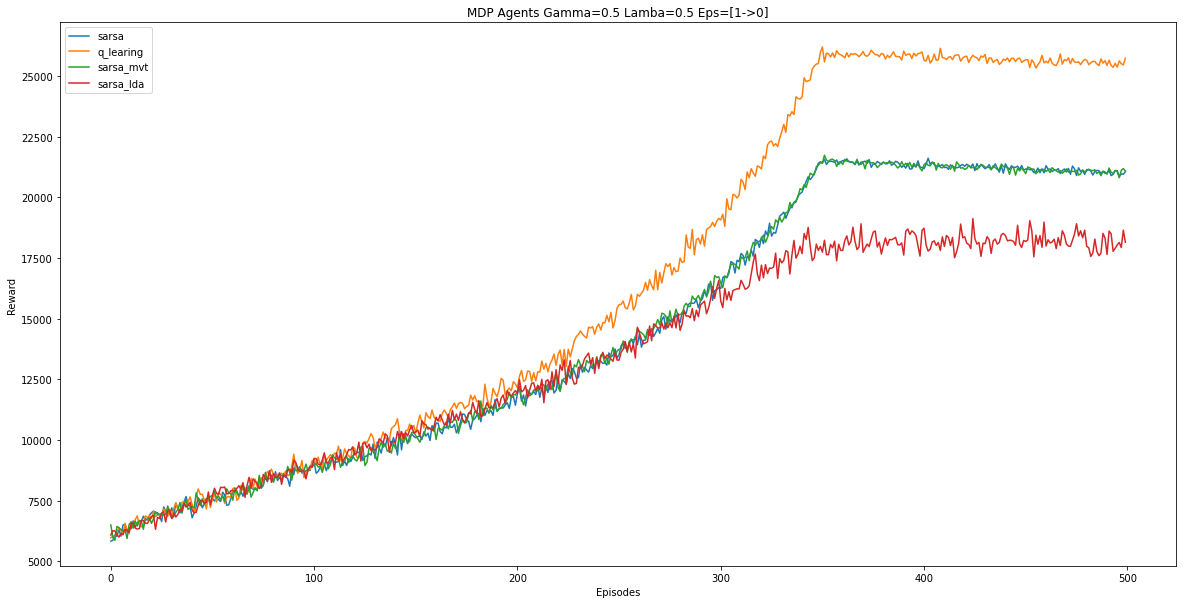

In [31]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
print('\n\nSARSA')
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("sarsa epsilon decay [1->0 till 500 eps]")
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa')


print('\n\nQlearning')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = q_learning(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='q_learing')

print('\n\nSARSA MVT')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = sarsa_mvt(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_mvt')

print('\n\nSARSA LDA')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = sarsa_lda(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.1, decayType='linear', maxTime=300, decayTill=350, lda=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_lda')
plt.title("MDP Agents Gamma=0.5 Lamba=0.5 Eps=[1->0]")

plt.legend()
plt.savefig('basic_mdp_stable.pdf')

In [32]:
def forgetfull_sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.5, alpha = 0.2, forgetDecay=0.1):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N=np.zeros(env.action_space.n-1)
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
    
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.argmax(Q)
      target = r - reward
      if not terminal : target = target + gamma*(Q[ns])
      error = target - Q[s]
      Q[s] += error/N[s]
      Q *=(1-forgetDecay)
      Q[s]/=(1-forgetDecay)
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
    rewards.append(reward)
    Q_est[i] = Q
    
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  
  for i in range(10):
    Q_test = np.array(Q)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q_test[s] += (r-reward-Q_test[s])/5
      reward = r
      a = np.argmax(Q_test)
      if a!=s : leave_count[s]+=1
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards

In [33]:
def forgetDecay_sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.5, alpha = 0.5, forgetDecay=0.1):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N=np.zeros(env.action_space.n-1)
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
    
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        ns = np.argmax(Q)
      target = r - reward
      if not terminal : target = target + gamma*(Q[ns])
      error = target - Q[s]
      Q[s] += error/N[s]
      Q *=(1-forgetDecay)
      Q[s]/=(1-forgetDecay)
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
    rewards.append(reward)
    Q_est[i] = Q
    forgetDecay=forgetDecay*0.5
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  
  for i in range(10):
    Q_test = np.array(Q)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q_test[s] += (r-reward-Q_test[s])/5
      reward = r
      a = np.argmax(Q_test)
      if a!=s : leave_count[s]+=1
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards

In [54]:
def wm_sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.5, alpha = 0.5, forgetDecay=0.1, capacity = 0.8):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q1 = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  Q2 = np.zeros(env.action_space.n-1)

  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
      forget = False
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        if np.random.rand(1) < capacity:
            ns = np.argmax(Q1)
        else:
            forget = True
            ns = np.argmax(Q2)
      target = r - reward
      if not terminal : target = target + gamma*Q1[ns]
      error = target - Q1[s]
      if forget:
            Q2[s] += error/N[s]
            Q2 *= (1-forgetDecay)
            Q2[s] /= (1-forgetDecay)
      else:
            Q1[s] += error/N[s]
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
    rewards.append(reward)
    Q_est[i] = Q1
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  
  for i in range(10):
    Q1_test = np.array(Q1)
    Q2_test = np.array(Q2)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q1_test[s] += (r-reward-Q1_test[s])/5
      reward = r
      if np.random.rand(1) < capacity:
            a = np.argmax(Q1_test)
      else:
            forget = True
            a = np.argmax(Q2_test)
      if a!=s : leave_count[s]+=1
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards



SARSA 0 Forgetful


<ipython-input-32-4074ad9bd01b>:54: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 20999.249999999993
avg_harvest_time 205.9
avg_travel_time 94.1
avg_staying_time [3.04454365        nan        nan 3.6849062  4.90531136        nan
 5.19879754        nan]


SARSA 0.5 Forgetful


<ipython-input-32-4074ad9bd01b>:54: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count
<ipython-input-32-4074ad9bd01b>:54: RuntimeWarning: divide by zero encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 1591.3799999999999
avg_harvest_time 284.95
avg_travel_time 15.050000000000011
avg_staying_time [inf nan nan nan nan nan nan nan]


 Sarsa Forget Decay


<ipython-input-33-7d4e9cbe9622>:54: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 19071.135000000002
avg_harvest_time 207.55
avg_travel_time 92.44999999999999
avg_staying_time [2.74183983        nan        nan 3.91429584 5.27840659        nan
 5.6689319         nan]


SARSA WM 5/8


<ipython-input-34-c2ef2f87523a>:67: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 13892.355
avg_harvest_time 146.06
avg_travel_time 153.94
avg_staying_time [1.57274171        nan        nan 1.67403146 1.87796179        nan
 2.11084883        nan]


SARSA WM 7/8


<ipython-input-34-c2ef2f87523a>:67: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 17232.39
avg_harvest_time 168.09499999999997
avg_travel_time 131.90500000000003
avg_staying_time [1.70063265        nan        nan 2.53521792 2.97188611        nan
 3.31332896        nan]


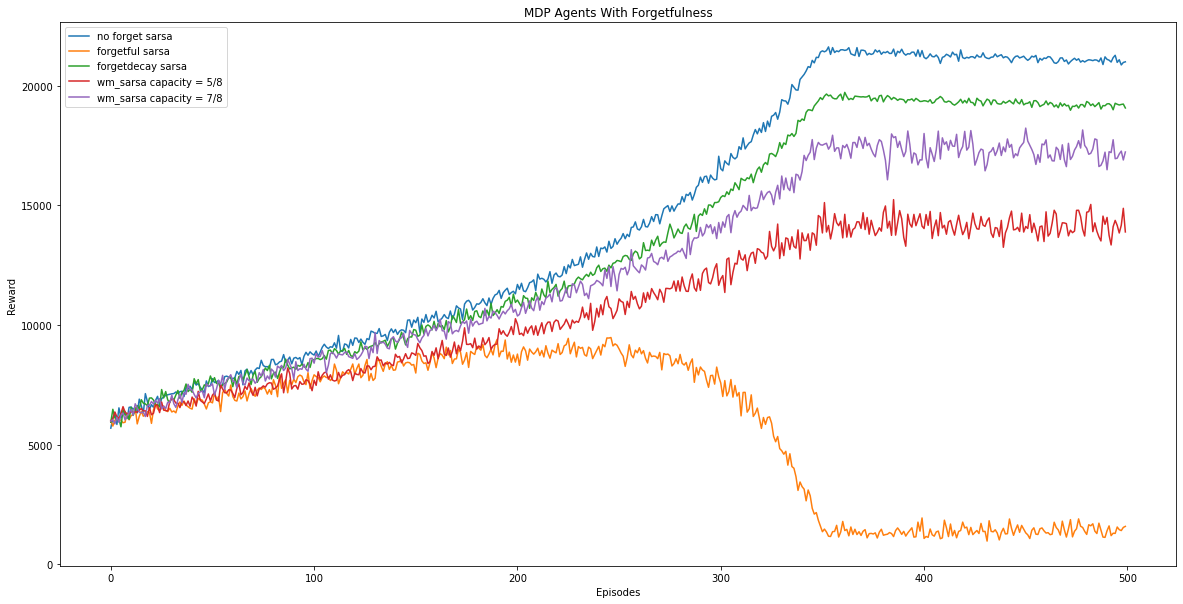

In [35]:
print('\n\nSARSA 0 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='no forget sarsa')

print('\n\nSARSA 0.5 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetful sarsa')

print('\n\n Sarsa Forget Decay')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = forgetDecay_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetdecay sarsa')

print('\n\nSARSA WM 5/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 5/8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 5/8')

print('\n\nSARSA WM 7/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 7/8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 7/8')
plt.title("MDP Agents With Forgetfulness")

plt.legend()
plt.savefig('forget_mdp.pdf')



SARSA


<ipython-input-27-c7a4cd248803>:55: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 16008.255000000008
avg_harvest_time 196.75
avg_travel_time 103.25
avg_staying_time [1.         3.88434458 4.26767791        nan 4.01862974        nan
 4.22446181        nan]


Qlearning
max_reward 18814.725000000002
avg_harvest_time 183.8
avg_travel_time 116.19999999999999
avg_staying_time [1.         3.52276557 3.30383013 1.         3.44064103 1.
 3.41826923 1.        ]


SARSA MVT


<ipython-input-29-fd6ef15bb06c>:60: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 16148.160000000009
avg_harvest_time 203.11999999999998
avg_travel_time 96.88000000000002
avg_staying_time [1.         4.64390509 4.49239739        nan 4.48824207        nan
 4.36284675        nan]


SARSA LDA


<ipython-input-30-685935dc2c0f>:58: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 14997.915000000003
avg_harvest_time 201.8
avg_travel_time 98.19999999999999
avg_staying_time [1.         4.42161658 4.89894615        nan 4.68914128        nan
 4.93967033        nan]


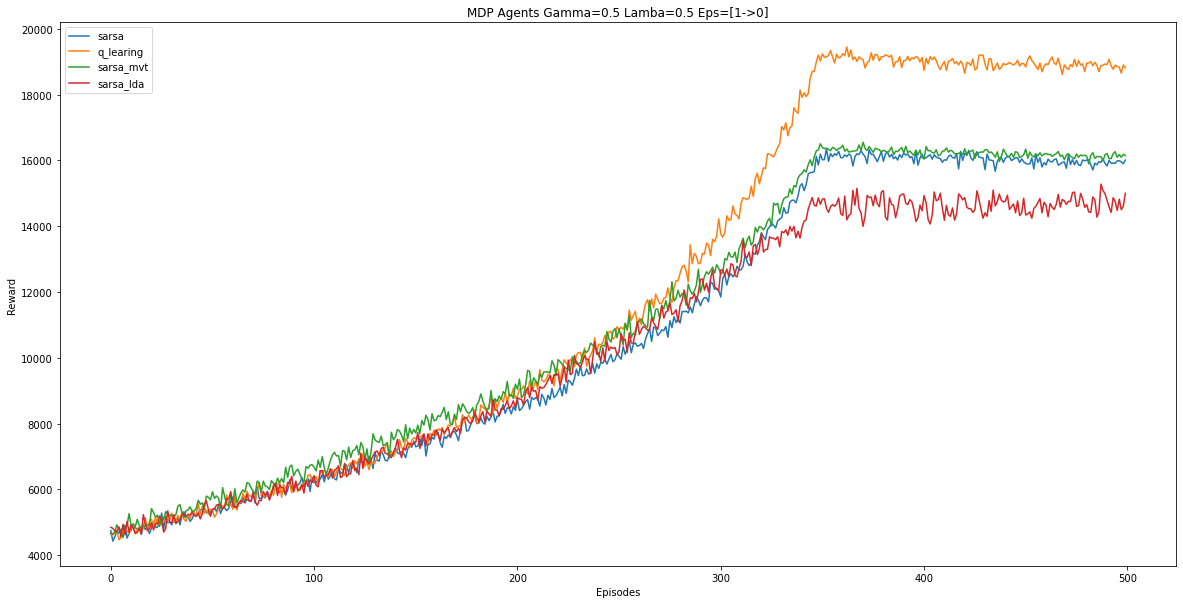

In [36]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
print('\n\nSARSA')
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.title("sarsa epsilon decay [1->0 till 500 eps]")
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa')


print('\n\nQlearning')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = q_learning(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='q_learing')

print('\n\nSARSA MVT')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = sarsa_mvt(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_mvt')

print('\n\nSARSA LDA')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = sarsa_lda(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.1, decayType='linear', maxTime=300, decayTill=350, lda=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='sarsa_lda')
plt.title("MDP Agents Gamma=0.5 Lamba=0.5 Eps=[1->0]")

plt.legend()
plt.savefig('basic_mdp_stable_b1.pdf')



SARSA 0 Forgetful


<ipython-input-32-4074ad9bd01b>:54: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 15842.115000000009
avg_harvest_time 196.35
avg_travel_time 103.65
avg_staying_time [1.         4.60793026 3.80437034        nan 3.70525618        nan
 4.30363819        nan]


SARSA 0.5 Forgetful


<ipython-input-32-4074ad9bd01b>:54: RuntimeWarning: divide by zero encountered in true_divide
  avg_staying_time = staying_time/leave_count
<ipython-input-32-4074ad9bd01b>:54: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 1143.8099999999997
avg_harvest_time 270.8
avg_travel_time 29.19999999999999
avg_staying_time [ 1. nan nan nan nan nan nan nan]


 Sarsa Forget Decay


<ipython-input-33-7d4e9cbe9622>:54: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 14624.865000000009
avg_harvest_time 200.45
avg_travel_time 99.55000000000001
avg_staying_time [1.         4.56232143 4.22696429        nan 4.29357143        nan
 4.34571429        nan]


SARSA WM 5/8


<ipython-input-34-c2ef2f87523a>:67: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 10594.980000000001
avg_harvest_time 140.765
avg_travel_time 159.235
avg_staying_time [1.0603647  1.69291768 1.78850281        nan 1.81761132        nan
 1.78724595        nan]


SARSA WM 7/8


<ipython-input-34-c2ef2f87523a>:67: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 12510.090000000006
avg_harvest_time 163.865
avg_travel_time 136.135
avg_staying_time [1.00662983 2.6087651  2.54682032        nan 2.56177832        nan
 2.542434          nan]


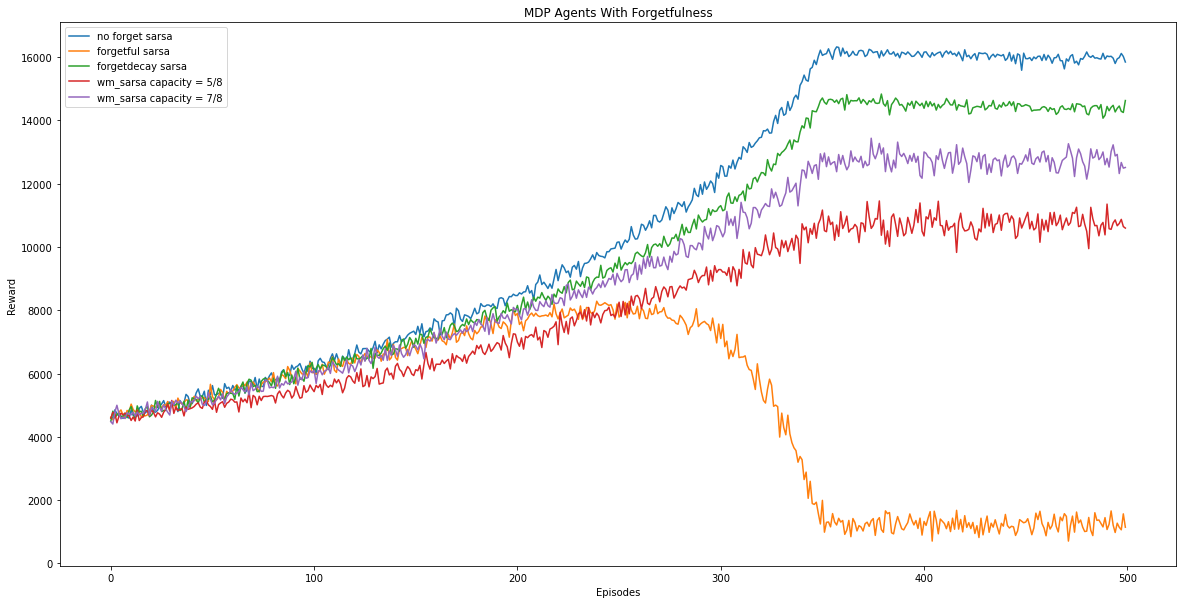

In [37]:
print('\n\nSARSA 0 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='no forget sarsa')

print('\n\nSARSA 0.5 Forgetful')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = forgetfull_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350,forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetful sarsa')

print('\n\n Sarsa Forget Decay')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = forgetDecay_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='forgetdecay sarsa')

print('\n\nSARSA WM 5/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 5/8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 5/8')

print('\n\nSARSA WM 7/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 7/8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa capacity = 7/8')
plt.title("MDP Agents With Forgetfulness")

plt.legend()
plt.savefig('forget_mdp_b1.pdf')

max_reward 25608.644999999964
avg_harvest_time 177.6
avg_travel_time 122.4
avg_staying_time [1.81974359 1.         1.         2.68020102 3.15988928 1.
 3.81896841 1.        ]


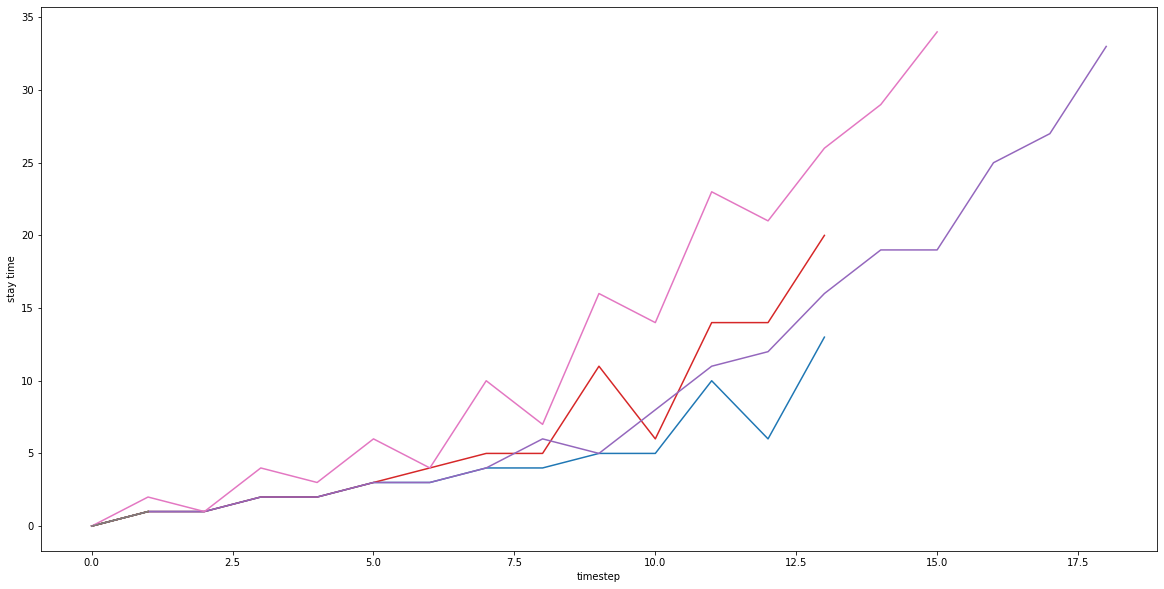

In [44]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs, patch = q1_learning(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('timestep')
plt.ylabel('stay time') 
for i in range (8):
    plt.plot(patch[i])


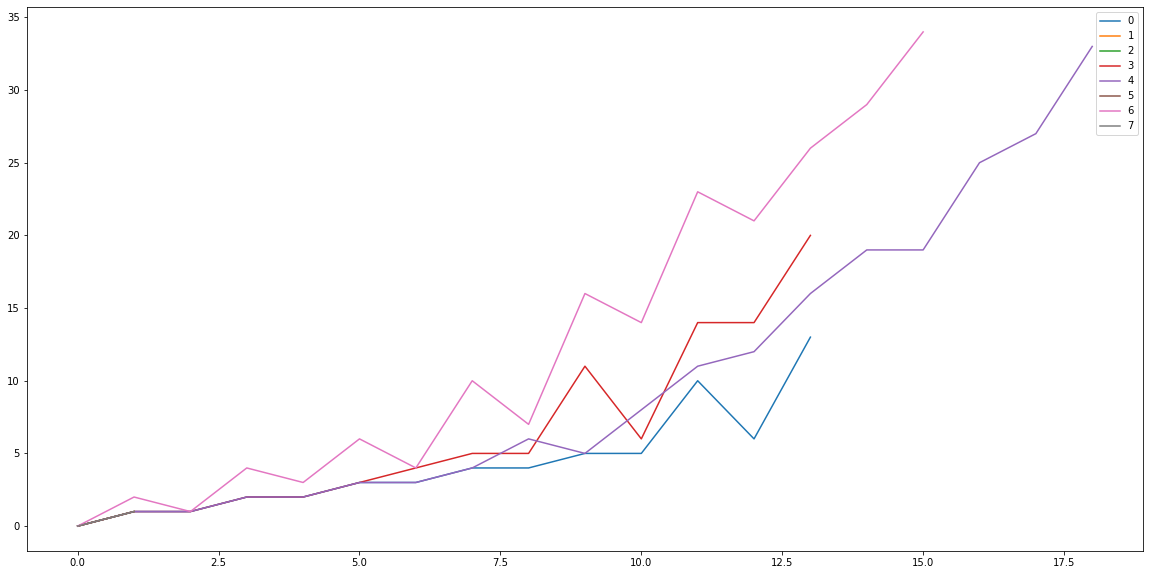

In [45]:
for i in range (8):
    plt.plot(patch[i], label=str(i))
plt.legend()

max_reward 18985.544999999995
avg_harvest_time 184.35
avg_travel_time 115.65
avg_staying_time [1.         3.24665064 3.45250916 1.         3.56240385 1.
 3.43448718 1.        ]


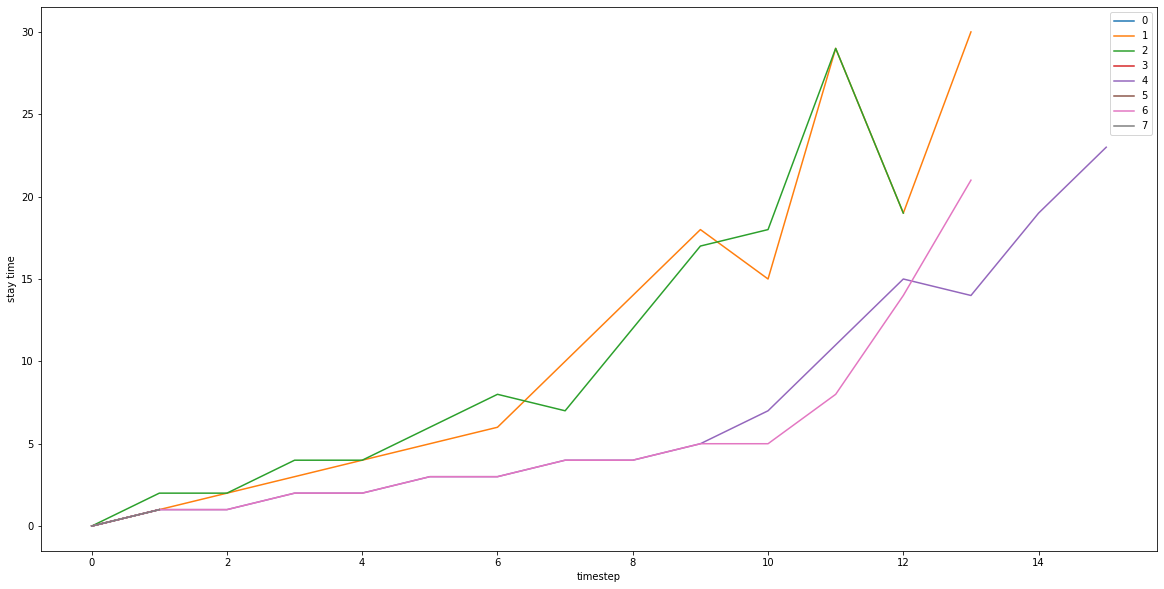

In [47]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs, patch = q1_learning(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, gamma=0.5, alpha=0.2)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('timestep')
plt.ylabel('stay time') 
for i in range (8):
    plt.plot(patch[i], label=str(i))
plt.legend()

In [57]:
def wm1_sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.5, alpha = 0.5, forgetDecay=0.1, capacity = 0.8):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q1 = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  Q2 = np.zeros(env.action_space.n-1)

  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
      forget = False
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        if np.random.rand(1) < capacity:
            ns = np.argmax(Q1)
        else:
            forget = True
            ns = np.argmax(Q2)
      target = r - reward
      if not terminal : target = target + gamma*Q1[ns]
      error = target - Q1[s]
      if forget:
            Q2[s] += error/N[s]
            Q2 *= (1-forgetDecay)
            Q2[s] /= (1-forgetDecay)
      else:
            Q1[s] += error/N[s]
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
    rewards.append(reward)
    Q_est[i] = Q1
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  patch_staying_time=[[0],[0],[0],[0],[0],[0],[0],[0]]
  for i in range(10):
    Q1_test = np.array(Q1)
    Q2_test = np.array(Q2)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q1_test[s] += (r-reward-Q1_test[s])/5
      reward = r
      if np.random.rand(1) < capacity:
            a = np.argmax(Q1_test)
      else:
            forget = True
            a = np.argmax(Q2_test)
      if a!=s : 
        leave_count[s]+=1
        if i==0: 
            patch_staying_time[s].append(staying_time[s]-patch_staying_time[s][-1])
            for k in range(8):
                if k==s: continue;
                patch_staying_time[k].append(0)
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards, patch_staying_time

<ipython-input-57-730a73cd2729>:73: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 14269.320000000002
avg_harvest_time 144.00500000000002
avg_travel_time 155.99499999999998
avg_staying_time [1.60004425        nan        nan 1.703726   1.86700823        nan
 2.10669128        nan]


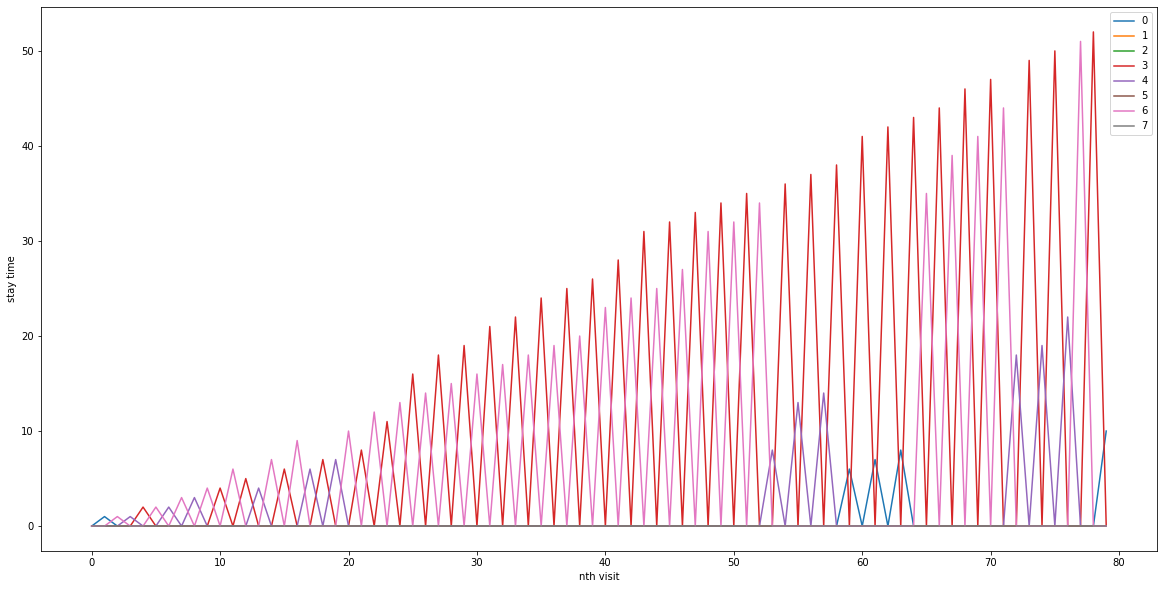

In [58]:
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs, patch = wm1_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 5/8)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('nth visit')
plt.ylabel('stay time') 
for i in range (8):
    plt.plot(patch[i], label=str(i))
plt.legend()

In [52]:
def wm2_sarsa(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, gamma = 0.5, alpha = 0.5, forgetDecay=0.1, capacity = 5):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q1 = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  Q2 = np.zeros(env.action_space.n-1)
  if env.block_type==1: L=5
  if env.block_type==2: L=6
  if env.block_type==3: L=8
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    s=env.current_state
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      N[s]+=1
      forget = False
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))
      if np.random.rand(1) < eps:
        ns = np.random.randint(env.action_space.n-1)
      else:
        if np.random.rand(1) < capacity/L:
            ns = np.argmax(Q1)
        else:
            forget = True
            ns = np.argmax(Q2)
      target = r - reward
      if not terminal : target = target + gamma*Q1[ns]
      error = target - Q1[s]
      if forget:
            Q2[s] += error/N[s]
            Q2 *= (1-forgetDecay)
            Q2[s] /= (1-forgetDecay)
      else:
            Q1[s] += error/N[s]
      s=ns
      reward = r
      _, r, terminal, info = env.step(s)
    rewards.append(reward)
    Q_est[i] = Q1
  staying_time=np.zeros(env.action_space.n-1)
  leave_count=np.zeros(env.action_space.n-1)
  
  for i in range(10):
    Q1_test = np.array(Q1)
    Q2_test = np.array(Q2)
    env.reset()
    reward = 0
    plot_rewards = []
    while env.time_elapsed < maxTime:
      s, r, terminal, info = env.step(8)
      staying_time[s]+=1
      Q1_test[s] += (r-reward-Q1_test[s])/5
      reward = r
      if np.random.rand(1) < capacity:
            a = np.argmax(Q1_test)
      else:
            forget = True
            a = np.argmax(Q2_test)
      if a!=s : leave_count[s]+=1
      s, r, terminal, info = env.step(a)
      plot_rewards.append(reward)
    #plt.plot(plot_rewards,label =str(i))
  avg_harvest_time=(np.sum(staying_time))/10
  avg_travel_time=300 - avg_harvest_time
  avg_staying_time = staying_time/leave_count
  rewards=(rewards,avg_harvest_time,avg_staying_time)

  return Q_est, rewards



SARSA WM 7/8


<ipython-input-54-c2ef2f87523a>:67: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 16033.50000000001
avg_harvest_time 195.6
avg_travel_time 104.4
avg_staying_time [1.         3.85617373 4.16291707        nan 4.26045523        nan
 4.09302528        nan]


<ipython-input-54-c2ef2f87523a>:67: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 18835.92
avg_harvest_time 196.7
avg_travel_time 103.30000000000001
avg_staying_time [1.                nan 4.44389194 3.15757035        nan 3.74578047
        nan 4.62709457]


<ipython-input-54-c2ef2f87523a>:67: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 21003.479999999992
avg_harvest_time 206.8
avg_travel_time 93.19999999999999
avg_staying_time [3.09140873        nan        nan 3.78323232 4.87546703        nan
 5.26272342        nan]


SARSA WM 7/8


<ipython-input-52-b37acf3637db>:69: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 11799.675000000003
avg_harvest_time 195.95
avg_travel_time 104.05000000000001
avg_staying_time [1.         4.29600759 4.23447827        nan 3.83862837        nan
 3.99756844        nan]


<ipython-input-52-b37acf3637db>:69: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 13686.839999999997
avg_harvest_time 195.7
avg_travel_time 104.30000000000001
avg_staying_time [1.                nan 4.65446886 2.76287879        nan 3.68616384
        nan 4.60913233]


<ipython-input-52-b37acf3637db>:69: RuntimeWarning: invalid value encountered in true_divide
  avg_staying_time = staying_time/leave_count


max_reward 13520.789999999999
avg_harvest_time 201.75
avg_travel_time 98.25
avg_staying_time [3.05963384        nan        nan 3.74272908 4.17047659        nan
 4.61162579        nan]


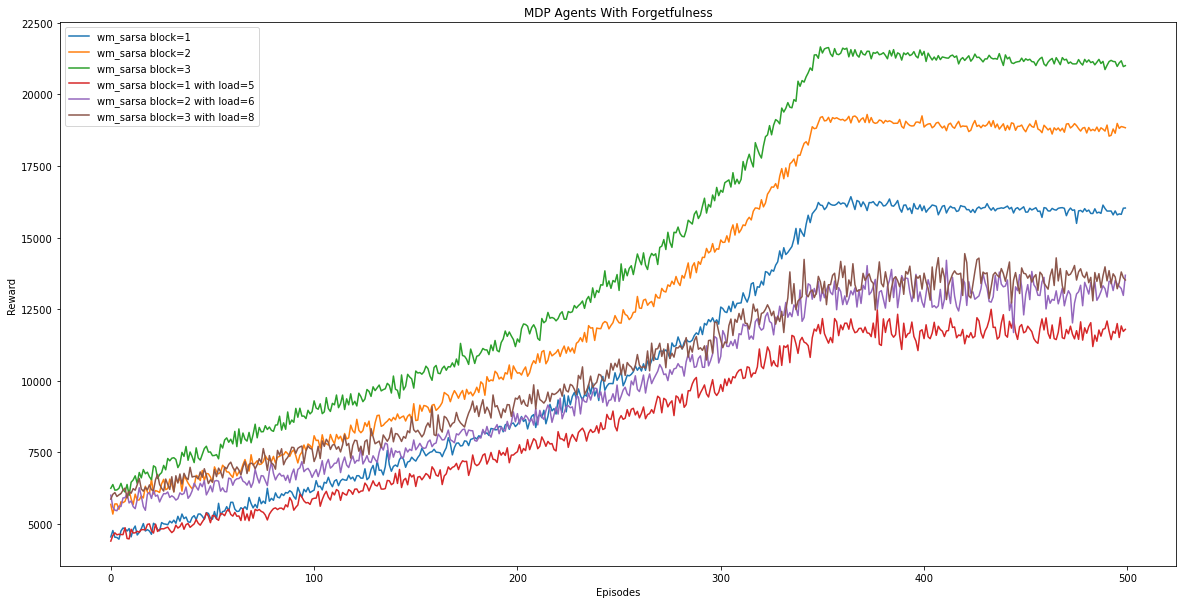

In [56]:
print('\n\nSARSA WM 7/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=1')
plt.title("MDP Agents With Forgetfulness")

avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=2)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=2')
plt.title("MDP Agents With Forgetfulness")

avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=3')
plt.title("MDP Agents With Forgetfulness")
print('\n\nSARSA WM 7/8')
avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=1)
    genv.reset()
    _,rs = wm2_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=1 with load=5')
plt.title("MDP Agents With Forgetfulness")

avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=2)
    genv.reset()
    _,rs = wm2_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=2 with load=6')
plt.title("MDP Agents With Forgetfulness")

avg_harvest_time=0
avg_staying_time=np.zeros(8)
max_reward = 0
RS = []
for _ in range(20):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = wm2_sarsa(env=genv, maxEpisodes=500, eps_start=1, eps_end=0.01, decayType='linear', maxTime=300, decayTill=350, forgetDecay=0.5, capacity = 4)
    RS.append(rs[0])
    max_reward+=rs[0][-1]
    avg_harvest_time+=rs[1]
    avg_staying_time+=rs[2]
print('max_reward',max_reward/20)
print('avg_harvest_time', avg_harvest_time/20)
print('avg_travel_time',300 - avg_harvest_time/20)
print('avg_staying_time',avg_staying_time/20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Episodes')
plt.ylabel('Reward') 
plt.plot(np.arange(500), np.mean(RS,axis=0), label='wm_sarsa block=3 with load=8')
plt.title("MDP Agents With Forgetfulness")

plt.legend()
plt.savefig('wm_b.pdf')